In [1]:
import matplotlib.pyplot as plt
import numpy as np
from addict import Dict
import seaborn as sns
sns.set()

In [3]:
import datetime
from base import Env
from mobility_engine import City, Location, PublicTransitStation
import mobility_config as mcfg
import mobility_utils as mutl

In [25]:
start_time = datetime.datetime(2020, 2, 28, 0, 0)
env = Env(start_time)

stores = [
    Location.random_location(env, capacity=30, location_type="store")
    for _ in range(10)
]
households = [
    Location.random_location(env, capacity=30, location_type="household")
    for _ in range(100)
]
workplaces = [
    Location.random_location(env, capacity=30, location_type="workplace")
    for _ in range(20)
]
miscs = [
    Location.random_location(env, capacity=30, location_type="misc")
    for _ in range(10)
]

stations = [PublicTransitStation.random_station(env=env, mobility_mode=mcfg.BUS, capacity=10) 
            for _ in range(100)]

In [26]:
city = City(env=env, locations=(stores + households + workplaces + miscs + stations))

In [27]:
# start, stop = [(u, v) for u, v, d in city.graph.edges if u in stations and v in stations][0]
start = stations
stop = stations[-1]
print(mutl.compute_geo_distance(start, stop))

0.8852419308181119 kilometer


In [28]:
mobility_mode_preference = {mcfg.WALKING: 1., mcfg.BUS: 1.}
trip_plan = city.plan_trip(start, stop, 
                           mobility_mode_preference=mobility_mode_preference)

print([t.mobility_mode for t in trip_plan])
print([t.travel_time for t in trip_plan])

lats = [t.source.lat for t in trip_plan] + [trip_plan[-1].destination.lat]
lons = [t.source.lon for t in trip_plan] + [trip_plan[-1].destination.lon]


[walking]
[<Quantity(0.17704838616362237, 'hour')>]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


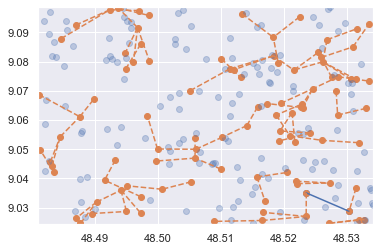

In [29]:
plt.figure()
cpal = sns.color_palette(n_colors=10)
colors = {mode: idx for idx, mode in enumerate(mcfg.MobilityMode.get_all_mobility_modes())}

for transit in trip_plan: 
    plt.plot([transit.source.lat, transit.destination.lat],
             [transit.source.lon, transit.destination.lon], 
             c=cpal[colors[transit.mobility_mode]])
    plt.scatter([transit.source.lat, transit.destination.lat],
                [transit.source.lon, transit.destination.lon], 
                c=cpal[0])

# Plot stations
plt.scatter([s.lat for s in stations], [s.lon for s in stations], c=cpal[1])

all_non_stations = set(city.graph.nodes) - set(stations)
plt.scatter([ns.lat for ns in all_non_stations], [ns.lon for ns in all_non_stations], c=cpal[0], alpha=0.3)

for u, v, d in city.graph.edges: 
    if u in stations and v in stations and d == mcfg.BUS: 
        plt.plot([u.lat, v.lat], [u.lon, v.lon], c=cpal[1], linestyle='--')

plt.xlim((mcfg.DEFAULT_CITY.COORD.SOUTH.LAT, mcfg.DEFAULT_CITY.COORD.NORTH.LAT))
plt.ylim((mcfg.DEFAULT_CITY.COORD.WEST.LON, mcfg.DEFAULT_CITY.COORD.EAST.LON))
plt.show()